# Breast Cancer Dataset

For this project we have dataset with features about the tumor of breast cancer. Features are typically about the dimension of tumor, smoothness etc. We will use this dataset to train & test mutltiple machine learning models change compare there accuracy to find out which model works best for this type of dataset.

- This dataset consists of **569 rows & 32 columns**.
- The dependent feature/variable is diagnosis with only two values **B for benign** & **M for malignant**.
- In this project, we are going to create **Decision Tree**, **Random Forest**, **Logistic Regression** & **Support Vector Machine** models & compare their accuracy.

## Importing libraries & reading dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')

## Basic information about dataset

In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

## Data Cleaning

### Task 1 : Drop column 'id'

We have a column id in our dataset was does not hold any important information which might prove to be significant to our ML model. So we will drop that column from our dataset.

In [7]:
df.drop('id', axis=1, inplace=True)

### Task 2 : Checking null values

Next, we will check if our dataset has any null values or blank rows.
<br><br>
We can see that our dataset has no null values.

In [8]:
df[df['diagnosis'].isna()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


### Task 3 : Creating dummy variable

Before starting our EDA, we will create a dummy variable using **diagnosis** column.

In [9]:
def dummy_var(diagnosis):
    if diagnosis == 'B':
        return 0
    else:
        return 1

In [10]:
df['dummy_diagnosis'] = df['diagnosis'].apply(dummy_var)

## Exploratory Data Analysis

### Task 3 : Checking the correlation between features

There are many features in our dataset and checking their correlation with our target variable will be time consuming. We can use **corr()** method to create a table correlation and then plot a heatmap to easily visualize & understand the correlation between each feature.

Using the heatmap below, we can select the most relevant features which have strong positive or strong negative relation with our target variable.

<Axes: >

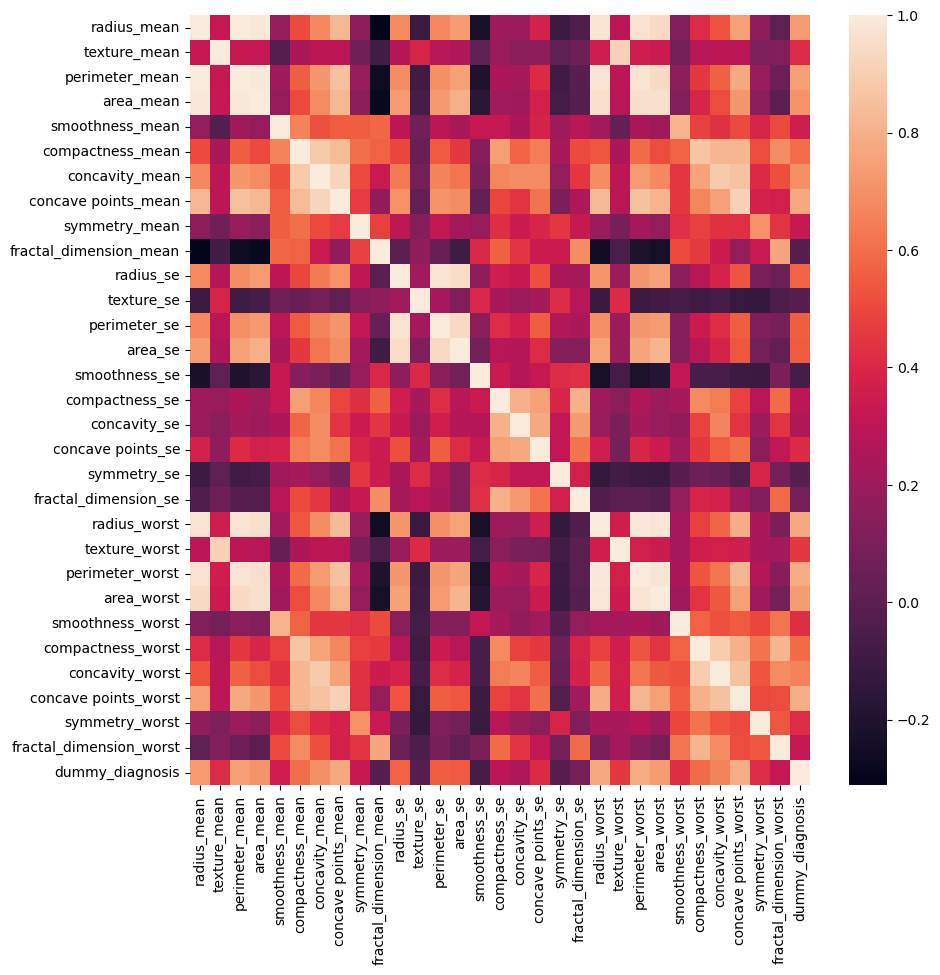

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True))

## Splitting Data for Training & Testing

In [12]:
X = df.drop(['diagnosis','dummy_diagnosis'],axis=1)
y = df['diagnosis']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree Model

### Creating & training model

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree_model = DecisionTreeClassifier()

In [17]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Using model for prediction

In [18]:
dtree_pred = dtree_model.predict(X_test)

## Random Forest Model

### Creating & training model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200)

In [21]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

### Using model for prediction

In [22]:
rf_preds = rf_model.predict(X_test)

## Logistic Regression

### Creating & training model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr_model = LogisticRegression()

In [25]:
lr_model.fit(X_train,y_train)

C:\Users\sheer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Using model for prediction

In [26]:
lr_preds = lr_model.predict(X_test)

## SVM Model

### Creating & training model

In [27]:
from sklearn.svm import SVC

In [28]:
svm_model = SVC()

In [29]:
svm_model.fit(X_train,y_train)

SVC()

### Using model for prediction

In [30]:
sv_preds = svm_model.predict(X_test)

## Accuracy Comparison

We are importing **classification_report** & **confusion_matric** from sklearn using which we are going to compare all the 4 models.

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print('Decision Tree')
print(confusion_matrix(y_test,dtree_pred))
print('\n')

print('Random Forest')
print(confusion_matrix(y_test,rf_preds))
print('\n')

print('Logistic Regression')
print(confusion_matrix(y_test,lr_preds))
print('\n')

print('Support Vector Machine')
print(confusion_matrix(y_test,sv_preds))

Decision Tree
[[98  7]
 [ 7 59]]


Random Forest
[[102   3]
 [  4  62]]


Logistic Regression
[[101   4]
 [  9  57]]


Support Vector Machine
[[102   3]
 [ 10  56]]


In [59]:
print('Decision Tree')
print(classification_report(y_test,dtree_pred))
print('\n')

print('Random Forest')
print(classification_report(y_test,rf_preds))
print('\n')

print('Logistic Regression')
print(classification_report(y_test,lr_preds))
print('\n')

print('Support Vector Machine')
print(classification_report(y_test,sv_preds))

Decision Tree
              precision    recall  f1-score   support

           B       0.93      0.93      0.93       105
           M       0.89      0.89      0.89        66

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



Random Forest
              precision    recall  f1-score   support

           B       0.96      0.97      0.97       105
           M       0.95      0.94      0.95        66

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Logistic Regression
              precision    recall  f1-score   support

           B       0.92      0.96      0.94       105
           M       0.93      0.86      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.9

## Conclusion

- From the confusion matrices & classification reports above, we can see that all the 4 models performed pretty good with accuracy above 90%.
<br>
- The clear winner is **Random Forest** model with least number of false positive & false negative outcomes as seen in confusion matrix & with 96% accuracy as seen in classification report. 